<a href="https://colab.research.google.com/github/csaitharun/UNP_CAPSTONE_PROJECT2/blob/main/churn_predictiont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Churn Prediction**



# **DATA PREPROCESSING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
URL="/content/drive/MyDrive/Customer Churn.csv"
data=pd.read_csv(URL)
df=pd.read_csv(URL)
data

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [ ]:
data.isna().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [ ]:
duplicated =data[data.duplicated()]
print('Before dropping duplicates:', data.shape[0])
print('Number of duplicate rows:', len(duplicated))

Before dropping duplicates: 3150
Number of duplicate rows: 300


In [ ]:
data=data.drop_duplicates()
data["Status"] = data.Status.replace((1,2),(0,1))
data



,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,0,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,0,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,0,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,0,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,0,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,0,17,1,9237,177,80,42,5,1,0,55,261.210,0
3097,13,0,18,4,3157,51,38,21,3,1,0,30,280.320,0
3099,8,1,11,2,1792,25,7,9,3,1,0,30,100.680,1
3123,26,0,38,9,10740,99,8,44,5,2,0,55,174.585,0


# **EDA(Exploratory Data Analysis)**

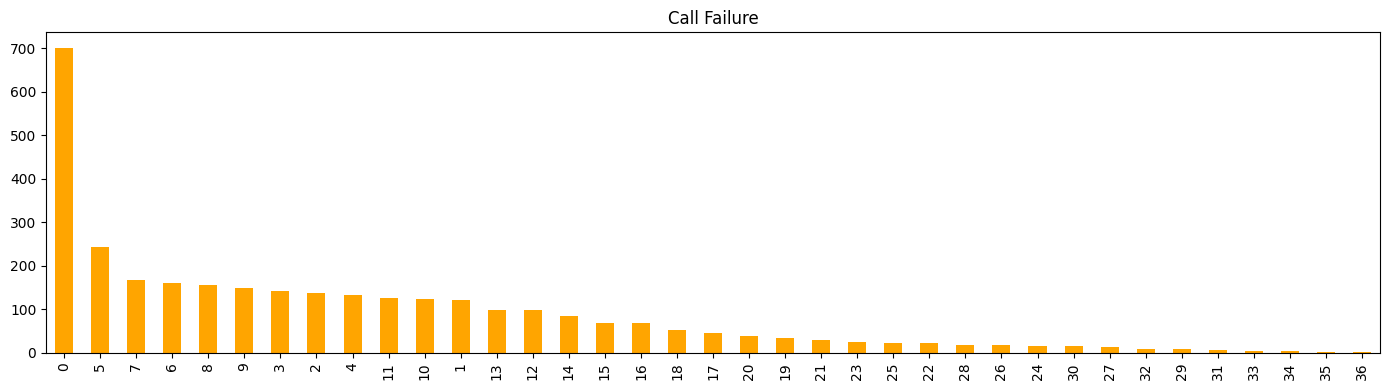

In [ ]:
#call Failure
plt.figure(figsize=(14, 4))
plt.plot(1, 2, 1)
df['Call  Failure'].value_counts().plot(kind='bar', color='orange')
plt.title('Call Failure')
plt.tight_layout()
plt.grid(False)
plt.show()

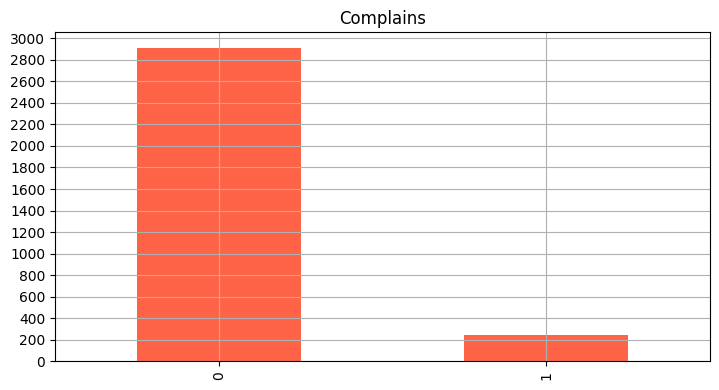

In [ ]:
#Complains using Bargraph
plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.yticks(range(0,4000,200))
df['Complains'].value_counts().plot(kind='bar', color='Tomato')
plt.title('Complains')
plt.tight_layout()
plt.grid(True)
plt.show()

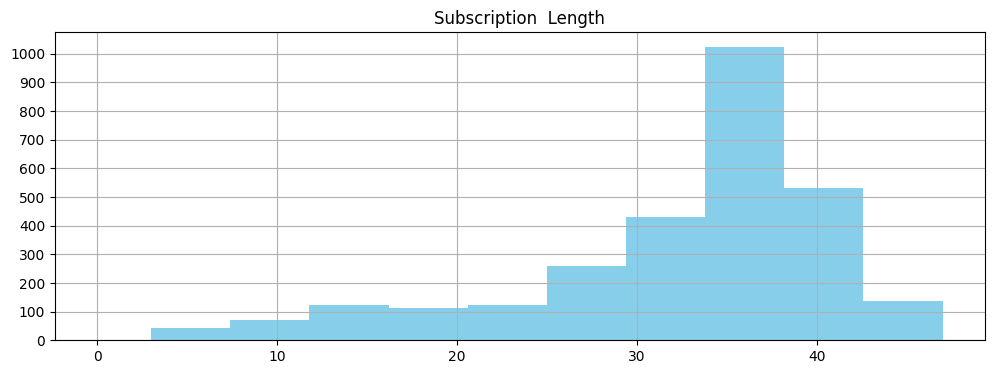

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(1, 2, 1)
plt.yticks(range(0,2000,100))
data['Subscription  Length'].hist(color='skyblue')
plt.title('Subscription  Length')
plt.grid(True)
plt.show()


<ipython-input-16-b52dafbe50a2>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='Charge  Amount', shade=True)


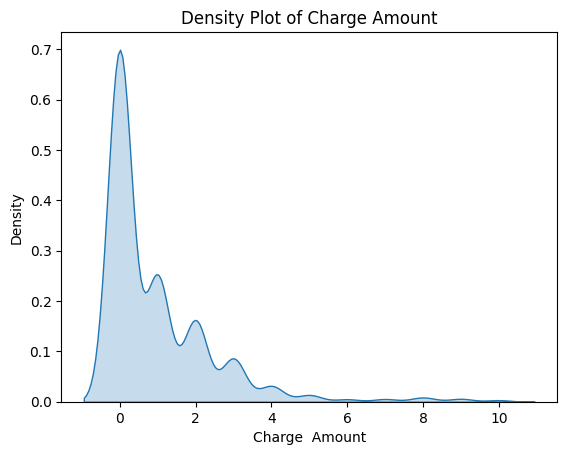

In [ ]:

sns.kdeplot(data=data, x='Charge  Amount', shade=True)
plt.title('Density Plot of Charge Amount')
plt.xlabel('Charge  Amount')
plt.ylabel('Density')
plt.show()

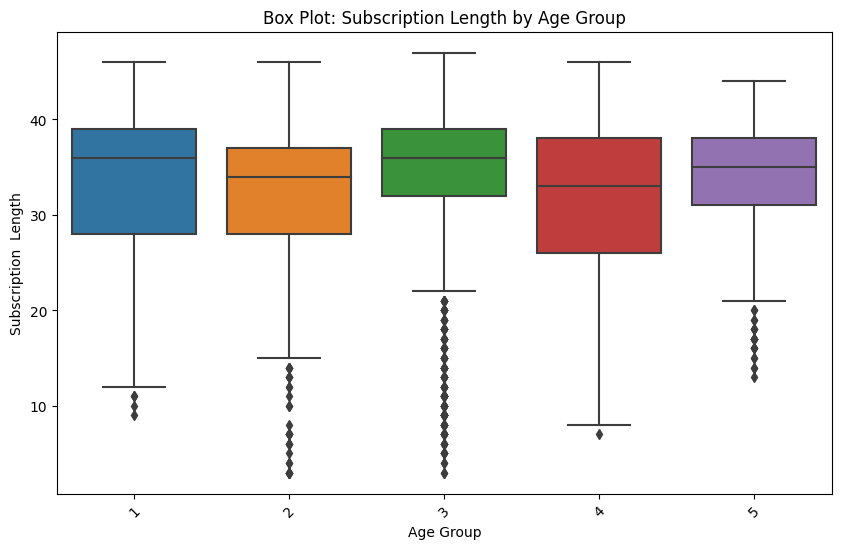

In [ ]:
#Subscription Length by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Age Group'], y=data['Subscription  Length'])
plt.title('Box Plot: Subscription Length by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Subscription  Length')
plt.xticks(rotation=45)
plt.show()





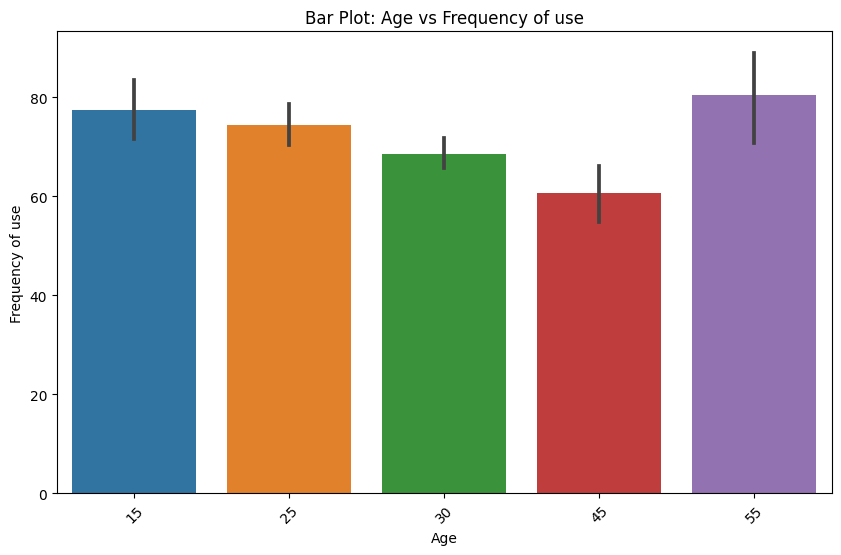

In [ ]:

# Compare Age Group and Frequency of SMS using bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Age'], y=data['Frequency of use'])
plt.title('Bar Plot: Age vs Frequency of use')
plt.xticks(rotation=45)
plt.show()






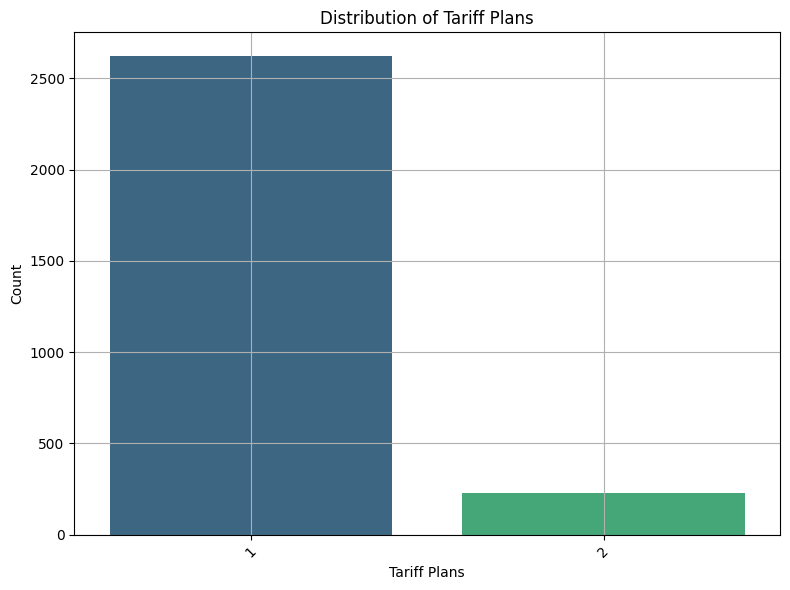

In [ ]:
#bar chart for Tariff Plan counts
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Tariff Plan', palette='viridis')
plt.xlabel('Tariff Plans')
plt.ylabel('Count')
plt.title('Distribution of Tariff Plans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


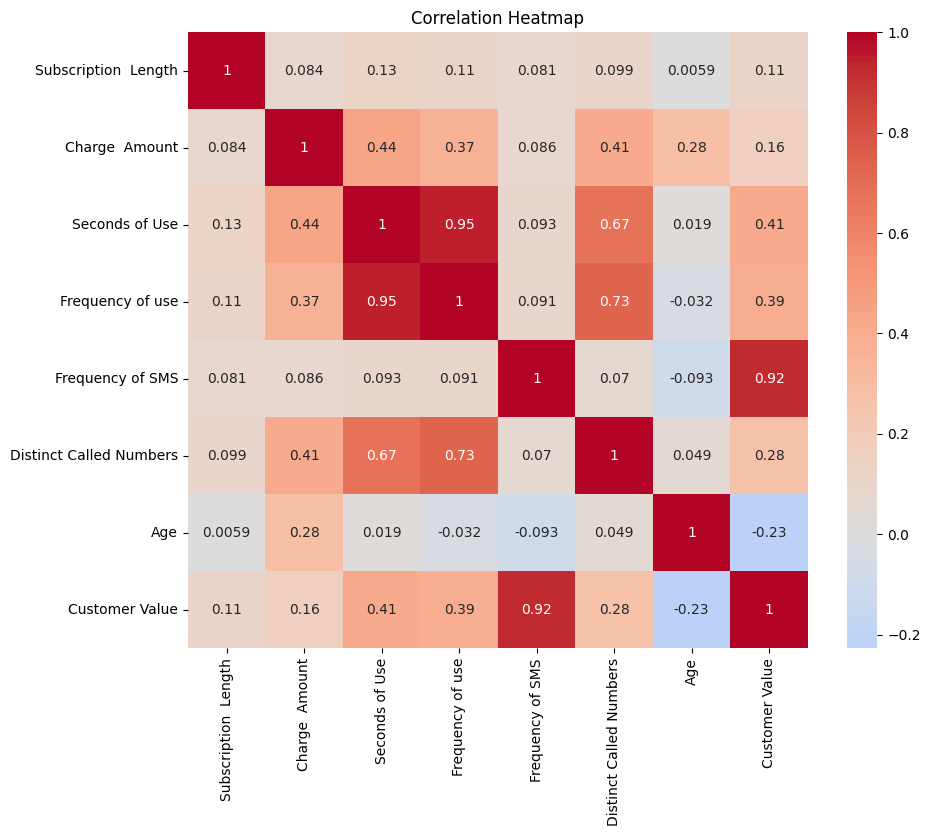

In [ ]:
numeric_columns = ['Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value']
numeric_data = data[numeric_columns]
# Correlation Heatmap
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Customer Value Distribution')

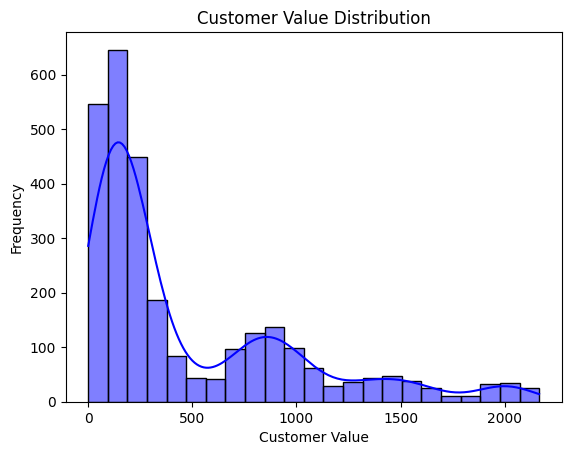

In [ ]:
sns.histplot(data=data, x='Customer Value', kde=True, color='blue')
plt.xlabel('Customer Value')
plt.ylabel('Frequency')
plt.title('Customer Value Distribution')

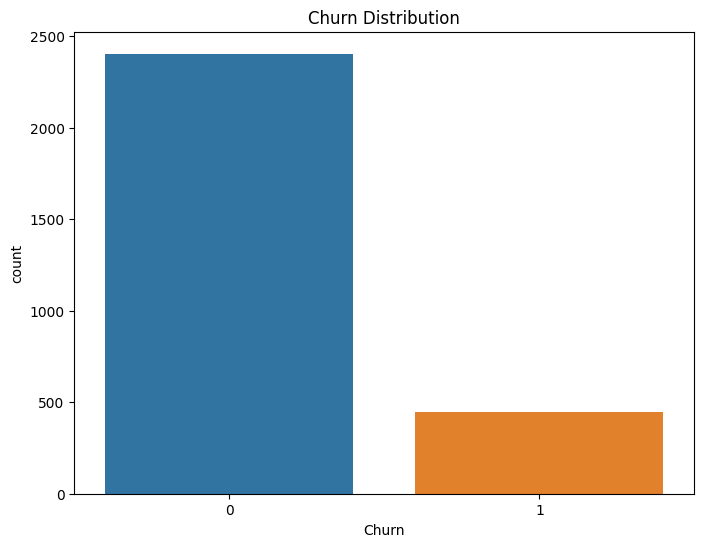

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data,x='Churn')
plt.title('Churn Distribution')
plt.show()

# **Logistic Regression**

In [ ]:
x = data.drop("Churn",axis = 1)
y = data['Churn']

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.3,random_state=7)

In [ ]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1995, 13)
(855, 13)
(1995,)
(855,)


In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train1,y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test1)

In [ ]:
print(classification_report(y_test1,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       724
           1       0.56      0.27      0.37       131

    accuracy                           0.86       855
   macro avg       0.72      0.62      0.64       855
weighted avg       0.83      0.86      0.83       855



In [ ]:
print(confusion_matrix(y_test1,predictions))

[[696  28]
 [ 95  36]]


In [ ]:
format(accuracy_score(y_test1,predictions),".2f")

'0.86'

In [ ]:
#with test size 0.25
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.20,random_state=7)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train2,y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test2)

In [ ]:
print(classification_report(y_test2,predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       476
           1       0.65      0.37      0.47        94

    accuracy                           0.86       570
   macro avg       0.77      0.67      0.70       570
weighted avg       0.85      0.86      0.85       570



In [ ]:
print(confusion_matrix(y_test2,predictions))

[[457  19]
 [ 59  35]]


In [ ]:
format(accuracy_score(y_test2,predictions),".2f")

'0.86'

In [ ]:
#with test size 0.25
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.25,random_state=7)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train3,y_train3)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test3)

In [ ]:
print(classification_report(y_test3,predictions))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       598
           1       0.66      0.23      0.35       115

    accuracy                           0.86       713
   macro avg       0.76      0.61      0.63       713
weighted avg       0.84      0.86      0.83       713



In [ ]:
print(confusion_matrix(y_test3,predictions))

[[584  14]
 [ 88  27]]


In [ ]:
format(accuracy_score(y_test3,predictions),".2f")

'0.86'

In [ ]:
#with test size 0.4
x_train4, x_test4, y_train4, y_test4 = train_test_split(x,y,test_size=0.4,random_state=7)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(x_train4,y_train4)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = logmodel.predict(x_test4)

In [ ]:
print(classification_report(y_test4,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       967
           1       0.54      0.20      0.29       173

    accuracy                           0.85      1140
   macro avg       0.71      0.59      0.61      1140
weighted avg       0.82      0.85      0.82      1140



In [ ]:
print(confusion_matrix(y_test4,predictions))

[[937  30]
 [138  35]]


In [ ]:
format(accuracy_score(y_test4,predictions),".2f")

'0.85'

# **Decision Tree Classifier**


In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']


In [ ]:
classify = DecisionTreeClassifier(criterion = "entropy", max_depth = 7, min_samples_split = 9, random_state = 10)

In [ ]:
classify.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [ ]:
classify.feature_importances_

array([0.02275784, 0.21327791, 0.09838374, 0.        , 0.12335056,
       0.04618062, 0.00336944, 0.08278981, 0.        , 0.        ,
       0.34005452, 0.0020681 , 0.06776746])

In [ ]:
y_predict = classify.predict(x_test1)

In [ ]:
classification_rep = classification_report(y_test1,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       724
           1       0.85      0.63      0.72       131

    accuracy                           0.93       855
   macro avg       0.89      0.80      0.84       855
weighted avg       0.92      0.93      0.92       855



In [ ]:
conf_matrix = confusion_matrix(y_test1,y_predict)
print(conf_matrix)

[[710  14]
 [ 49  82]]


In [ ]:
accuracy = format(accuracy_score(y_test1,y_predict),".2f")
print(accuracy)

0.93


In [ ]:
cross_val_score(classify, x_train1, y_train1, cv = 10)

array([0.935     , 0.93      , 0.945     , 0.93      , 0.935     ,
       0.91959799, 0.92462312, 0.93467337, 0.92462312, 0.91959799])

In [ ]:
classify.fit(x_train2,y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [ ]:
classify.feature_importances_

array([0.04455664, 0.21983969, 0.09721085, 0.        , 0.09380241,
       0.04172744, 0.01476754, 0.06688164, 0.02977001, 0.        ,
       0.31830541, 0.        , 0.07313837])

In [ ]:
y_predict = classify.predict(x_test2)

In [ ]:
classification_rep = classification_report(y_test2,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       476
           1       0.82      0.69      0.75        94

    accuracy                           0.92       570
   macro avg       0.88      0.83      0.85       570
weighted avg       0.92      0.92      0.92       570



In [ ]:
conf_matrix = confusion_matrix(y_test2,y_predict)
print(conf_matrix)

[[462  14]
 [ 29  65]]


In [ ]:
accuracy = format(accuracy_score(y_test2,y_predict),".2f")
print(accuracy)

0.92


In [ ]:
cross_val_score(classify, x_train2, y_train2, cv = 10)

array([0.92982456, 0.93859649, 0.91666667, 0.95175439, 0.92105263,
       0.9122807 , 0.93421053, 0.94736842, 0.89912281, 0.92982456])

In [ ]:
classify.fit(x_train3,y_train3)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [ ]:
classify.feature_importances_

array([0.02257414, 0.21680527, 0.09242344, 0.        , 0.11301853,
       0.03536029, 0.00620849, 0.09243103, 0.02826521, 0.        ,
       0.32194768, 0.        , 0.07096591])

In [ ]:
y_predict = classify.predict(x_test3)

In [ ]:
classification_rep = classification_report(y_test3,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       598
           1       0.82      0.70      0.76       115

    accuracy                           0.93       713
   macro avg       0.88      0.84      0.86       713
weighted avg       0.92      0.93      0.92       713



In [ ]:
conf_matrix = confusion_matrix(y_test3,y_predict)
print(conf_matrix)

[[580  18]
 [ 34  81]]


In [ ]:
accuracy = format(accuracy_score(y_test3,y_predict),".2f")
print(accuracy)

0.93


In [ ]:
cross_val_score(classify, x_train3, y_train3, cv = 10)

array([0.92523364, 0.92990654, 0.92523364, 0.95327103, 0.94392523,
       0.91121495, 0.90654206, 0.93896714, 0.92018779, 0.92957746])

In [ ]:
classify.fit(x_train4,y_train4)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=9,
                       random_state=10)

In [ ]:
classify.feature_importances_

array([0.01799398, 0.20869005, 0.07758055, 0.        , 0.11575311,
       0.02894923, 0.05158243, 0.10068367, 0.02615685, 0.        ,
       0.34281259, 0.        , 0.02979754])

In [ ]:
y_predict = classify.predict(x_test4)

In [ ]:
classification_rep = classification_report(y_test4,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       967
           1       0.84      0.67      0.75       173

    accuracy                           0.93      1140
   macro avg       0.89      0.82      0.85      1140
weighted avg       0.93      0.93      0.93      1140



In [ ]:
conf_matrix = confusion_matrix(y_test4,y_predict)
print(conf_matrix)

[[945  22]
 [ 57 116]]


In [ ]:
accuracy = format(accuracy_score(y_test4,y_predict),".2f")
print(accuracy)

0.93


In [ ]:
cross_val_score(classify, x_train4, y_train4, cv = 10)

array([0.9122807 , 0.92982456, 0.94152047, 0.94152047, 0.89473684,
       0.90643275, 0.94736842, 0.92982456, 0.90643275, 0.92982456])

# **Random Forest Classifier**

In [ ]:
rf_classify = RandomForestClassifier(criterion = "entropy", max_depth = 8, min_samples_split = 10, random_state=42)

In [ ]:
rf_classify.fit(x_train1, y_train1)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=42)

In [ ]:
rf_classify.feature_importances_

array([0.04226559, 0.19999136, 0.07614658, 0.01463928, 0.12772671,
       0.11930155, 0.05460058, 0.06311608, 0.0249952 , 0.00151322,
       0.16450194, 0.02326265, 0.08793927])

In [ ]:
y_predict = rf_classify.predict(x_test1)

In [ ]:
classification_rep = classification_report(y_test1,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       724
           1       0.92      0.74      0.82       131

    accuracy                           0.95       855
   macro avg       0.93      0.86      0.89       855
weighted avg       0.95      0.95      0.95       855



In [ ]:
conf_matrix = confusion_matrix(y_test1,y_predict)
print(conf_matrix)

[[715   9]
 [ 34  97]]


In [ ]:
accuracy = format(accuracy_score(y_test1,y_predict),".2f")
print(accuracy)

0.95


In [ ]:
cross_val_score(rf_classify, x_train1, y_train1, cv = 10)

array([0.945     , 0.93      , 0.975     , 0.965     , 0.945     ,
       0.92964824, 0.92964824, 0.94974874, 0.93969849, 0.92964824])

In [ ]:
rf_classify = RandomForestClassifier(criterion = "entropy", max_depth = 8, min_samples_split = 10, random_state=42)

In [ ]:
rf_classify.fit(x_train2, y_train2)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=42)

In [ ]:
rf_classify.feature_importances_

array([0.04035561, 0.22024887, 0.08396389, 0.01161537, 0.12998454,
       0.11297228, 0.05399964, 0.0638865 , 0.02209363, 0.00134532,
       0.1478399 , 0.02107483, 0.09061962])

In [ ]:
y_predict = rf_classify.predict(x_test2)

In [ ]:
classification_rep = classification_report(y_test2,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       476
           1       0.92      0.73      0.82        94

    accuracy                           0.95       570
   macro avg       0.93      0.86      0.89       570
weighted avg       0.94      0.95      0.94       570



In [ ]:
conf_matrix = confusion_matrix(y_test2,y_predict)
print(conf_matrix)

[[470   6]
 [ 25  69]]


In [ ]:
accuracy = format(accuracy_score(y_test2,y_predict),".2f")
print(accuracy)

0.95


In [ ]:
cross_val_score(rf_classify, x_train2, y_train2, cv = 10)

array([0.94298246, 0.95614035, 0.93421053, 0.97368421, 0.95614035,
       0.92982456, 0.92982456, 0.94736842, 0.9254386 , 0.93421053])

In [ ]:
rf_classify = RandomForestClassifier(criterion = "entropy", max_depth = 8, min_samples_split = 10, random_state=42)

In [ ]:
rf_classify.fit(x_train3, y_train3)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=42)

In [ ]:
rf_classify.feature_importances_

array([0.04608984, 0.2078581 , 0.07846341, 0.0153818 , 0.13628089,
       0.11956668, 0.05621401, 0.0579996 , 0.02398116, 0.00296594,
       0.1518953 , 0.02272601, 0.08057726])

In [ ]:
y_predict = rf_classify.predict(x_test3)

In [ ]:
classification_rep = classification_report(y_test3,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       598
           1       0.91      0.76      0.82       115

    accuracy                           0.95       713
   macro avg       0.93      0.87      0.90       713
weighted avg       0.95      0.95      0.95       713



In [ ]:
conf_matrix = confusion_matrix(y_test3,y_predict)
print(conf_matrix)

[[589   9]
 [ 28  87]]


In [ ]:
accuracy = format(accuracy_score(y_test3,y_predict),".2f")
print(accuracy)

0.95


In [ ]:
cross_val_score(rf_classify, x_train3, y_train3, cv = 10)

array([0.95327103, 0.93457944, 0.95794393, 0.98130841, 0.94859813,
       0.92523364, 0.92990654, 0.96244131, 0.9342723 , 0.92488263])

In [ ]:
rf_classify = RandomForestClassifier(criterion = "entropy", max_depth = 8, min_samples_split = 10, random_state=42)

In [ ]:
rf_classify.fit(x_train4, y_train4)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=10,
                       random_state=42)

In [ ]:
rf_classify.feature_importances_

array([0.04229696, 0.21017043, 0.07084863, 0.01175527, 0.12687435,
       0.1173356 , 0.06296999, 0.07278358, 0.02401115, 0.00134024,
       0.15016178, 0.02516632, 0.08428571])

In [ ]:
y_predict = rf_classify.predict(x_test4)

In [ ]:
classification_rep = classification_report(y_test4,y_predict)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       967
           1       0.92      0.69      0.79       173

    accuracy                           0.94      1140
   macro avg       0.94      0.84      0.88      1140
weighted avg       0.94      0.94      0.94      1140



In [ ]:
conf_matrix = confusion_matrix(y_test4,y_predict)
print(conf_matrix)

[[957  10]
 [ 53 120]]


In [ ]:
accuracy = format(accuracy_score(y_test4,y_predict),".2f")
print(accuracy)

0.94


In [ ]:
cross_val_score(rf_classify, x_train4, y_train4, cv = 10)

array([0.93567251, 0.97660819, 0.95906433, 0.96491228, 0.9122807 ,
       0.92982456, 0.95321637, 0.94152047, 0.92397661, 0.94152047])

# **K - Nearest Neighbors Classifier**

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_predict1 = knn_classifier.predict(x_test1)

In [ ]:
classification_rep = classification_report(y_test1,y_predict1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       724
           1       0.54      0.26      0.35       131

    accuracy                           0.85       855
   macro avg       0.71      0.61      0.63       855
weighted avg       0.83      0.85      0.83       855



In [ ]:
conf_matrix = confusion_matrix(y_test1,y_predict1)
print(conf_matrix)

[[695  29]
 [ 97  34]]


In [ ]:
accuracy = format(accuracy_score(y_test1,y_predict1),".3f")
print(accuracy)

0.853


In [ ]:
knn_classifier.fit(x_train2, y_train2)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_predict2 = knn_classifier.predict(x_test2)

In [ ]:
classification_rep = classification_report(y_test2,y_predict2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       476
           1       0.70      0.28      0.40        94

    accuracy                           0.86       570
   macro avg       0.79      0.63      0.66       570
weighted avg       0.84      0.86      0.84       570



In [ ]:
conf_matrix = confusion_matrix(y_test2,y_predict2)
print(conf_matrix)

[[465  11]
 [ 68  26]]


In [ ]:
accuracy = format(accuracy_score(y_test2,y_predict2),".2f")
print(accuracy)

0.86


In [ ]:
knn_classifier.fit(x_train3, y_train3)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_predict3 = knn_classifier.predict(x_test3)

In [ ]:
classification_rep = classification_report(y_test3,y_predict3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       598
           1       0.56      0.26      0.36       115

    accuracy                           0.85       713
   macro avg       0.71      0.61      0.63       713
weighted avg       0.82      0.85      0.82       713



In [ ]:
conf_matrix = confusion_matrix(y_test3,y_predict3)
print(conf_matrix)

[[574  24]
 [ 85  30]]


In [ ]:
accuracy = format(accuracy_score(y_test3,y_predict3),".2f")
print(accuracy)

0.85


In [ ]:
knn_classifier.fit(x_train4, y_train4)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
y_predict4 = knn_classifier.predict(x_test4)

In [ ]:
classification_rep = classification_report(y_test4,y_predict4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.88      0.96      0.91       967
           1       0.50      0.24      0.32       173

    accuracy                           0.85      1140
   macro avg       0.69      0.60      0.62      1140
weighted avg       0.82      0.85      0.82      1140



In [ ]:
conf_matrix = confusion_matrix(y_test4,y_predict4)
print(conf_matrix)

[[926  41]
 [132  41]]


In [ ]:
accuracy = format(accuracy_score(y_test4, y_predict4),".3f")
print(accuracy)

0.848


# **Support Vector Classifier**

In [ ]:
svc_classifier = SVC(kernel = "linear")
svc_classifier.fit(x_train1, y_train1)

SVC(kernel='linear')

In [ ]:
y_predict1 = svc_classifier.predict(x_test1)

In [ ]:
classification_rep = classification_report(y_test1,y_predict1)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       724
           1       0.71      0.59      0.64       131

    accuracy                           0.90       855
   macro avg       0.82      0.77      0.79       855
weighted avg       0.89      0.90      0.90       855



In [ ]:
conf_matrix = confusion_matrix(y_test1,y_predict1)
print(conf_matrix)

[[693  31]
 [ 54  77]]


In [ ]:
accuracy = format(accuracy_score(y_test1, y_predict1),".3f")
print(accuracy)

0.901


In [ ]:
svc_classifier = SVC(kernel = "linear")
svc_classifier.fit(x_train2, y_train2)

SVC(kernel='linear')

In [ ]:
y_predict2 = svc_classifier.predict(x_test2)

In [ ]:
classification_rep = classification_report(y_test2,y_predict2)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       476
           1       0.74      0.63      0.68        94

    accuracy                           0.90       570
   macro avg       0.83      0.79      0.81       570
weighted avg       0.90      0.90      0.90       570



In [ ]:
conf_matrix = confusion_matrix(y_test2,y_predict2)
print(conf_matrix)

[[455  21]
 [ 35  59]]


In [ ]:
accuracy = format(accuracy_score(y_test2, y_predict2),".3f")
print(accuracy)

0.902


In [ ]:
svc_classifier = SVC(kernel = "linear")
svc_classifier.fit(x_train3, y_train3)

SVC(kernel='linear')

In [ ]:
y_predict3 = svc_classifier.predict(x_test3)

In [ ]:
classification_rep = classification_report(y_test3,y_predict3)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       598
           1       0.71      0.62      0.66       115

    accuracy                           0.90       713
   macro avg       0.82      0.78      0.80       713
weighted avg       0.89      0.90      0.89       713



In [ ]:
conf_matrix = confusion_matrix(y_test3,y_predict3)
print(conf_matrix)

[[569  29]
 [ 44  71]]


In [ ]:
accuracy = format(accuracy_score(y_test3, y_predict3),".3f")
print(accuracy)

0.898


In [ ]:
svc_classifier = SVC(kernel = "linear")
svc_classifier.fit(x_train4, y_train4)

SVC(kernel='linear')

In [ ]:
y_predict4 = svc_classifier.predict(x_test4)

In [ ]:
classification_rep = classification_report(y_test4,y_predict4)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       967
           1       0.69      0.58      0.63       173

    accuracy                           0.90      1140
   macro avg       0.81      0.77      0.79      1140
weighted avg       0.89      0.90      0.89      1140



In [ ]:
conf_matrix = confusion_matrix(y_test4,y_predict4)
print(conf_matrix)

[[921  46]
 [ 72 101]]


In [ ]:
accuracy = format(accuracy_score(y_test4, y_predict4),".3f")
print(accuracy)

0.896
